# Author : Firmin Atchagako# Date : 28/08/2024

### Define the probleme 

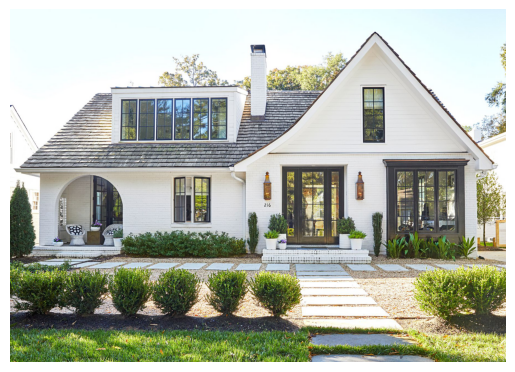

In [24]:
import matplotlib.image as mpimg
img = mpimg.imread('1.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

# Qu'est-ce que le dataset California Housing ?#
Le dataset California Housing est un ensemble de données largement utilisé dans l'apprentissage automatique pour s'entraîner à résoudre des problèmes de régression. Il contient des informations sur les propriétés immobilières en Californie, telles que :#•	Données démographiques: population, revenu médian, etc#
•	Caractéristiques des propriétés: nombre de pièces, âge moyen des maisons, et#
•	Localisation géographique: latitude, longitu#.
•	Variable cible: prix médian d maisonsn.


# Quel problème d'apprentissage automatique résout-on avec ce dataset ?
L'objectif principal est de prédire le prix médian d'une maison en Californie en fonction des autres caractéristiques disponibles dans le dataset. C'est un problème typique de régression.


In [100]:
# import librairies and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
%matplotlib inline

In [101]:
# Load the dataset and create a dataframe from this
# import the dataset
house_data = pd.read_csv('housing.csv')
house_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Exploring the dataset

# Provides a summury of dataframe

In [102]:
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


# Generates descriptive statistiques for numerical column

In [103]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Displays the first few rows of dataframe

In [104]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Checking missing value in a dataset¶

In [105]:
house_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# # Data cleaning (handling missing values and irrevelant columns)

In [107]:
###  Filling missing values in the total_bedrooms column(Median is the mid point value)
house_data['total_bedrooms']= house_data['total_bedrooms'].fillna(house_data['total_bedrooms'].mean())

## Mesuring the statistics relationship betwen a housing_data variables

In [108]:
print(house_data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Find outliers 

In [110]:
# To calculate the quartiles and IQR
Q1 = house_data['median_house_value'].quantile(0.25)
Q3 =  house_data['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
# Define the outliers limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3  + 1.5 * IQR
# identify the ouliers values
outliers = house_data[(house_data['median_house_value']< lower_bound) | (house_data['median_house_value']> upper_bound)]
print("valeurs aberrantes détéctées: ")
print(outliers)

valeurs aberrantes détéctées: 
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
89       -122.27     37.80                52.0        249.0            78.0   
140      -122.18     37.81                30.0        292.0            38.0   
459      -122.25     37.87                52.0        609.0           236.0   
489      -122.25     37.86                48.0       2153.0           517.0   
493      -122.24     37.86                52.0       1668.0           225.0   
...          ...       ...                 ...          ...             ...   
20422    -118.90     34.14                35.0       1503.0           263.0   
20426    -118.69     34.18                11.0       1177.0           138.0   
20427    -118.80     34.19                 4.0      15572.0          2222.0   
20436    -118.69     34.21                10.0       3663.0           409.0   
20443    -118.85     34.27                50.0        187.0            33.0   

       population  h

In [111]:
# to delete the ouliers value 
house_data_cleaned = house_data[(house_data['median_house_value'] >= lower_bound) & (house_data['median_house_value']<= upper_bound)]

In [112]:
print(" données sans valeurs  aberrantes : ")
print(house_data_cleaned)

 données sans valeurs  aberrantes : 
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       populat

# Dropping  a ocean_proximity column

In [123]:
house_data_cleaned =house_data_cleaned.drop(columns=['ocean_proximity'])

In [124]:
house_data_cleaned.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924031,-0.101691,0.044735,0.070191,0.101638,0.056346,-0.010808,-0.047342
latitude,-0.924031,1.000000,0.006104,-0.033798,-0.068286,-0.114359,-0.073547,-0.076249,-0.149100
housing_median_age,-0.101691,0.006104,1.000000,-0.372715,-0.326596,-0.294893,-0.310343,-0.197628,0.061480
total_rooms,0.044735,-0.033798,-0.372715,1.000000,0.931110,0.859642,0.921278,0.226557,0.147526
total_bedrooms,0.070191,-0.068286,-0.326596,0.931110,1.000000,0.875347,0.973927,0.024602,0.078245
population,0.101638,-0.114359,-0.294893,0.859642,0.875347,1.000000,0.909218,0.045413,0.017764
households,0.056346,-0.073547,-0.310343,0.921278,0.973927,0.909218,1.000000,0.049055,0.099352
median_income,-0.010808,-0.076249,-0.197628,0.226557,0.024602,0.045413,0.049055,1.000000,0.644267
median_house_value,-0.047342,-0.149100,0.061480,0.147526,0.078245,0.017764,0.099352,0.644267,1.000000


# dropping column and splitting data

In [125]:
X = house_data_cleaned.drop(columns=['median_house_value'])
y = house_data_cleaned['median_house_value']

In [117]:
house_data_cleaned.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [126]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state = 42)

In [127]:
print(X_train.shape,X_test.shape)

(15655, 8) (3914, 8)


# Standardize the features

In [128]:
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

#  initialise and train the regression model

In [129]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

# 
Making predictions

In [130]:
y_pred= model.predict(X_test_scaled)
y_pred

array([ 74747.38050415, 128726.2701118 , 261189.13900352, ...,
       169719.22186104, 228841.10418274, 133428.93214741])

# Evaluate the model : using Mean Squared Error (MSE),   Mean Absolute  Error (MAE) and R2 ( determination coefficient)

In [131]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [132]:
print("Mean Absolute Error:" , MAE)
print("Mean Squared Error:" , MSE)
print("R- Squared:", r2)

Mean Absolute Error: 44585.379349951014
Mean Squared Error: 3585071186.9282236
R- Squared: 0.6123494081149208


# predicting a small sample of data

In [136]:
Sample_data = X_test.head()
Sample_data_scaled =  Scaler.transform(Sample_data)
predictions = model.predict(Sample_data_scaled)

In [137]:
print(" Prédictions:", predictions)
print("Actual values:", y_test.head().values)

 Prédictions: [ 74747.38050415 128726.2701118  261189.13900352 171205.84624638
 199909.7129558 ]
Actual values: [ 55200.  97800. 245300. 162100. 163100.]


# Create a scatter plot

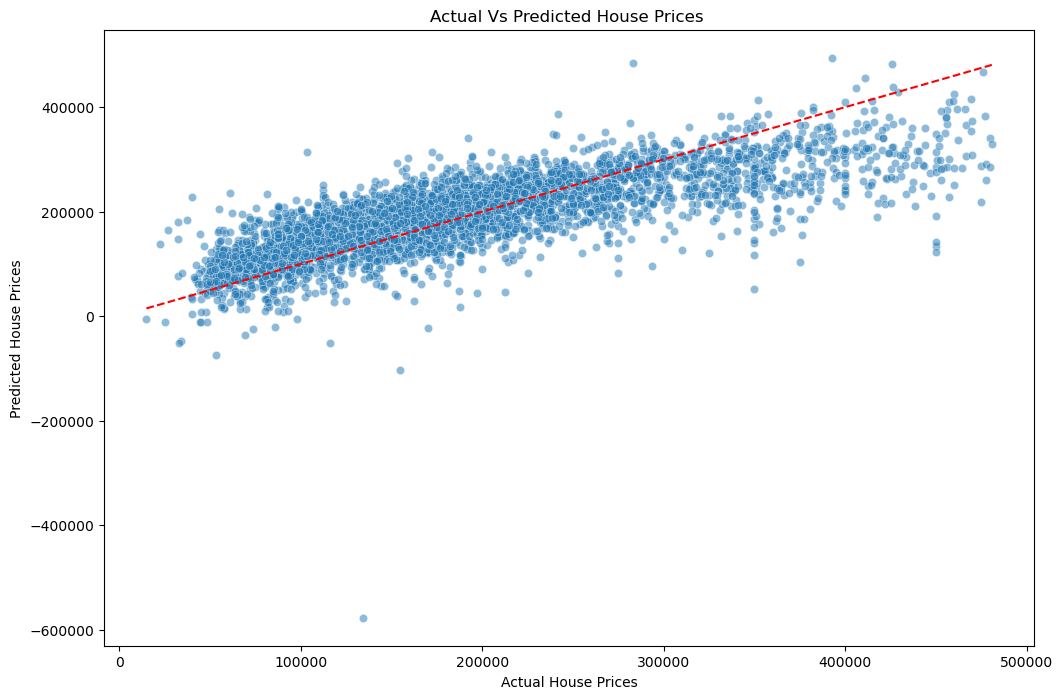

In [139]:
plt.figure(figsize= (12,8))
sns.scatterplot( x=y_test,y=y_pred, alpha = 0.5)
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color ='red', linestyle='--')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title("Actual Vs Predicted House Prices ")
plt.show()

# Creating a bar plot 

<Figure size 1400x700 with 0 Axes>

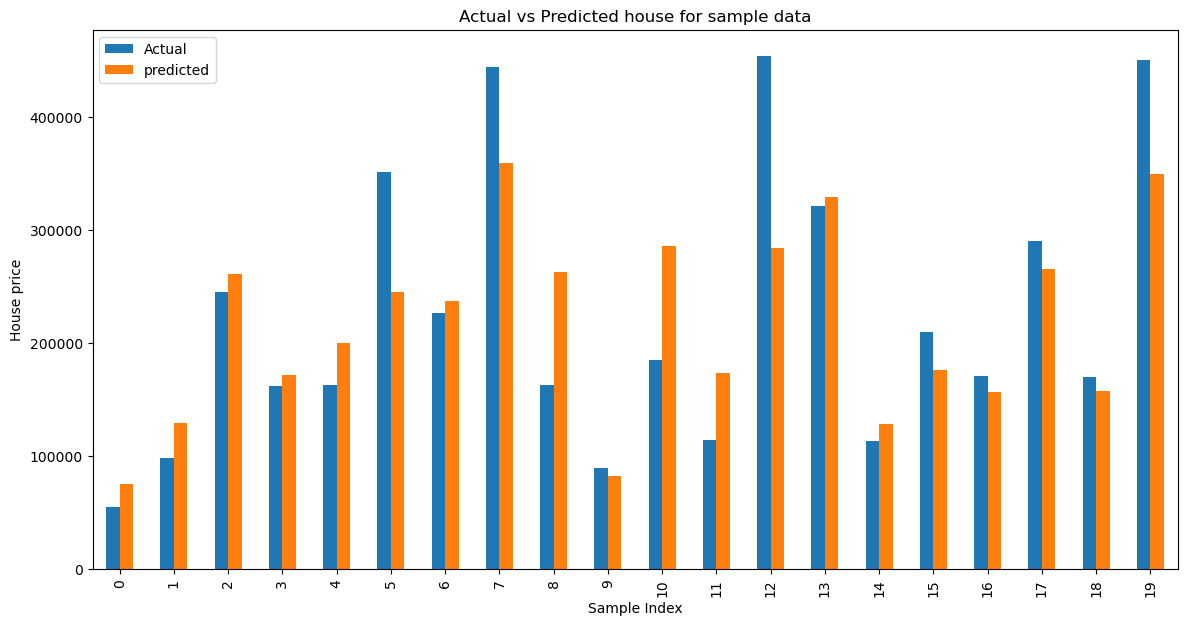

In [148]:
sample_size = 20
indices = np.arange(sample_size)
actual_prices = y_test[:sample_size].values
predicted_prices = y_pred[:sample_size]
Sample_df = pd.DataFrame({
    'Actual' :actual_prices,
    'predicted' : predicted_prices
})
plt.figure(figsize=(14,7))
Sample_df.plot(kind='bar',figsize=(14,7))
plt.xlabel('Sample Index')
plt.ylabel('House price')
plt.title( 'Actual vs Predicted house for sample data')
plt.show()

# Save the housing model 

#### import joblib
joblib.dump(model,'california_house_prices_scaler.pkl')

In [152]:
model_scaler  = {
    'model' : model,
    'scaler' : Scaler}
joblib.dump(model_scaler, 'model_scaler.pkl')

['model_scaler.pkl']